# About Dataset

Dataset: [Airplane Price Prediction](https://www.kaggle.com/datasets/asinow/airplane-price-dataset)

This dataset contains 12,377 rows and is designed for machine learning models to predict airplane prices. The data simulates real-world factors affecting airplane costs, making it ideal for regression tasks, exploratory data analysis, and model training. Below is an explanation of the dataset's structure and columns:

| Sütun Adı                  | Açıklama                                                                 |
|----------------------------|-------------------------------------------------------------------------|
| **Model**                  | Uçak modeli (örn. Boeing 737, Airbus A320). Marka ve performansı temsil eder. |
| **Üretim Yılı**            | Uçağın üretildiği yıl. Yaş hesaplamasında kullanılır.                   |
| **Motor Sayısı**           | Uçaktaki motor sayısı (1: piston, 2: diğer).                           |
| **Motor Türü**             | Motor tipi (örn. Turbofan, Piston). Performans ve yakıt verimliliğini etkiler. |
| **Kapasite**               | Yolcu kapasitesi. Daha büyük uçaklar daha yüksek fiyata sahiptir.       |
| **Menzil (km)**            | Uçağın menzili (km). Daha fazla menzil, operasyonel esneklik sağlar.    |
| **Yakıt Tüketimi (L/saat)**| Ortalama yakıt tüketimi (L/saat). Turbofan motorlar daha az yakıt tüketir. |
| **Saatlik Bakım Maliyeti (Dolar)** | Ortalama saatlik bakım maliyeti (Dolar). Yüksek maliyet, talebi düşürebilir. |
| **Yaş**                    | Uçağın yaşı (2023 - Üretim Yılı). Eski uçaklar daha düşük fiyatlıdır.   |
| **Satış Bölgesi**          | Uçağın satıldığı bölge (örn. Asya, Avrupa). Bölgesel talebi etkiler.    |
| **Fiyat (Dolar)**              | Uçağın fiyatı (Dolar). Tahmin edilecek hedef değişken.                      |

# Pace: Plan

## Import Packages

In [ ]:
#Data Manipulation
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

## Load Dataset

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('key')
os.environ["KAGGLE_USERNAME"] = userdata.get('username')

In [ ]:
!kaggle datasets download -d asinow/airplane-price-dataset

!unzip "airplane-price-dataset.zip"

Dataset URL: https://www.kaggle.com/datasets/asinow/airplane-price-dataset
License(s): other
100% 238k/238k [00:00<00:00, 768kB/s]
100% 238k/238k [00:00<00:00, 767kB/s]
Archive:  airplane-price-dataset.zip
  inflating: airplane_price_dataset.csv  


In [ ]:
df = pd.read_csv('/content/airplane_price_dataset.csv')
df.head()

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05


## Data Exploration

In [ ]:
df.dtypes

,0
Model,object
Üretim Yılı,int64
Motor Sayısı,int64
Motor Türü,object
Kapasite,int64
Menzil (km),int64
Yakıt Tüketimi (L/saat),float64
Saatlik Bakım Maliyeti ($),float64
Yaş,int64
Satış Bölgesi,object


Model, Motor türü ve satış bölgesi object diğerleri numeric

In [ ]:
df.isna().sum()

,0
Model,0
Üretim Yılı,0
Motor Sayısı,0
Motor Türü,0
Kapasite,0
Menzil (km),0
Yakıt Tüketimi (L/saat),0
Saatlik Bakım Maliyeti ($),0
Yaş,0
Satış Bölgesi,0


In [ ]:
df.describe()

,Üretim Yılı,Motor Sayısı,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Fiyat ($)
count,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,1.237700e+04
mean,2001.477660,1.835259,190.413994,7782.210148,12.075615,2744.089599,21.522340,1.988336e+08
std,12.766785,0.370962,142.662710,5492.478746,9.905418,1293.209611,12.766785,2.290392e+08
min,1980.000000,1.000000,4.000000,1285.000000,2.000000,500.020000,0.000000,1.458148e+05
25%,1990.000000,2.000000,50.000000,3000.000000,5.950000,1627.260000,10.000000,1.409681e+07
50%,2001.000000,2.000000,162.000000,5700.000000,9.820000,2744.330000,22.000000,8.392191e+07
75%,2013.000000,2.000000,350.000000,14800.000000,13.470000,3848.840000,33.000000,3.843239e+08
max,2023.000000,2.000000,396.000000,15600.000000,49.970000,4999.660000,43.000000,9.782132e+08


Basit istatistik verilerine göre bir anormallik gözükmüyor

In [ ]:
df.duplicated().sum()

0

Tekrar eden veri de yok.

# pAce: Analyze

## Data Visualization

In [ ]:
categoric_columns = df.select_dtypes(include='object').columns
numeric_columns = df.select_dtypes(exclude='object').columns

print(categoric_columns)
print(numeric_columns)

Index(['Model', 'Motor Türü', 'Satış Bölgesi'], dtype='object')
Index(['Üretim Yılı', 'Motor Sayısı', 'Kapasite', 'Menzil (km)',
       'Yakıt Tüketimi (L/saat)', 'Saatlik Bakım Maliyeti ($)', 'Yaş',
       'Fiyat ($)'],
      dtype='object')


In [ ]:
for col in categoric_columns:
  print(f'{col}: {df[col].value_counts()}')
  print()

Model: Model
Boeing 737           2121
Airbus A350          2107
Bombardier CRJ200    2051
Airbus A320          2048
Cessna 172           2039
Boeing 777           2011
Name: count, dtype: int64

Motor Türü: Motor Türü
Turbofan    10338
Piston       2039
Name: count, dtype: int64

Satış Bölgesi: Satış Bölgesi
Afrika           2171
Avustralya       2071
Avrupa           2062
Güney Amerika    2053
Asya             2017
Kuzey Amerika    2003
Name: count, dtype: int64



- Kategorik verilerimizi incelediğimizde motor türü harici dengeli bir şekilde dağıldığını görüyoruz.

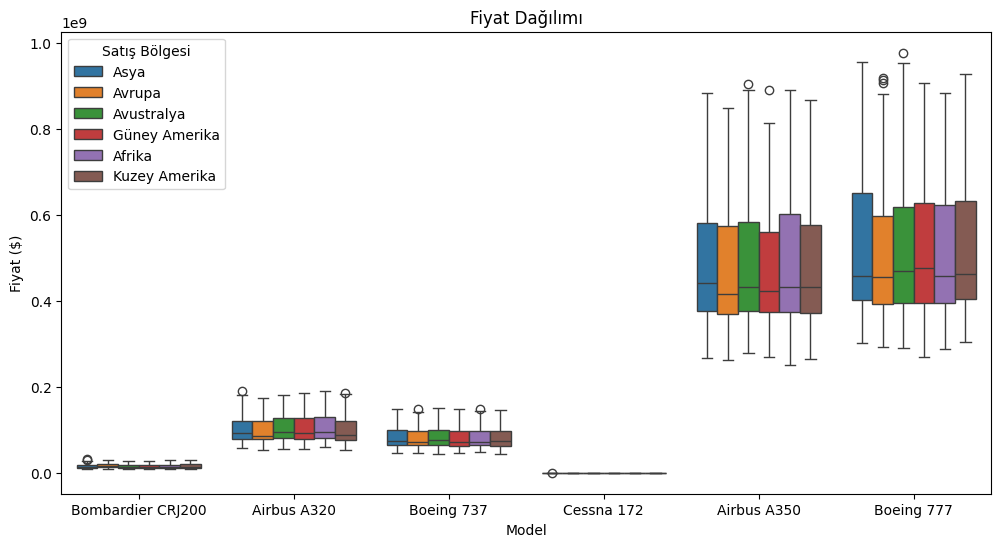

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "Model", y = "Fiyat ($)", hue = "Satış Bölgesi")
plt.title("Fiyat Dağılımı")
plt.xlabel("Model")
plt.ylabel("Fiyat ($)")
plt.show()

- Farklı modellerin farklı bölgelerdeki satış fiyatlarında gözle görülür bir fark yok. Boeing 777'nin Avrupadaki satışında aykırı veri noktaları içeriyor.

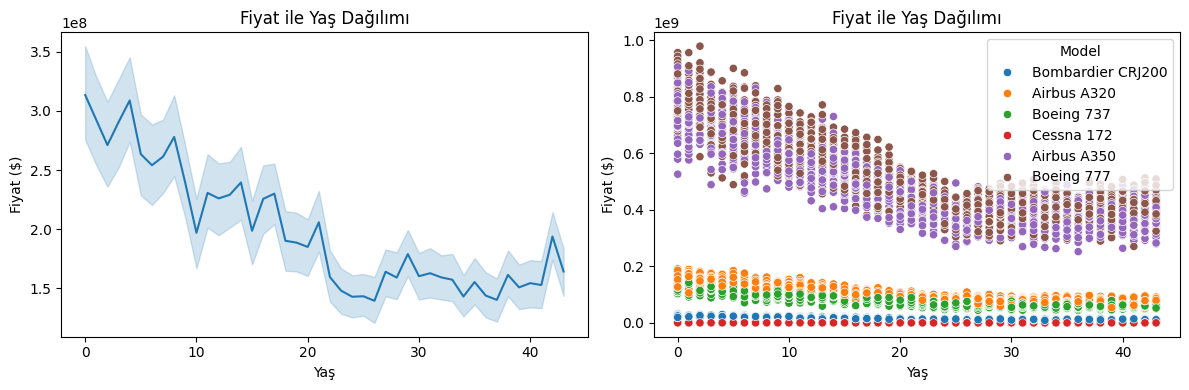

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x=df["Yaş"], y=df["Fiyat ($)"], ax=ax[0])
ax[0].set_title("Fiyat ile Yaş Dağılımı")
ax[0].set_xlabel("Yaş")
ax[0].set_ylabel("Fiyat ($)")

sns.scatterplot(x=df["Yaş"], y=df["Fiyat ($)"], hue=df["Model"], ax=ax[1])
ax[1].set_title("Fiyat ile Yaş Dağılımı")
ax[1].set_xlabel("Yaş")
ax[1].set_ylabel("Fiyat ($)")

plt.tight_layout()
plt.show()



- Genel ve doğal olarak uçağın yaşı arttıkça fiyatı aynı şekilde düşme eğilimi gösteriyor. Fakat bu düşüş bazı modeller için daha hızlı olurken bazı modeller için daha hafif bir şekilde gerçekleşmiş.

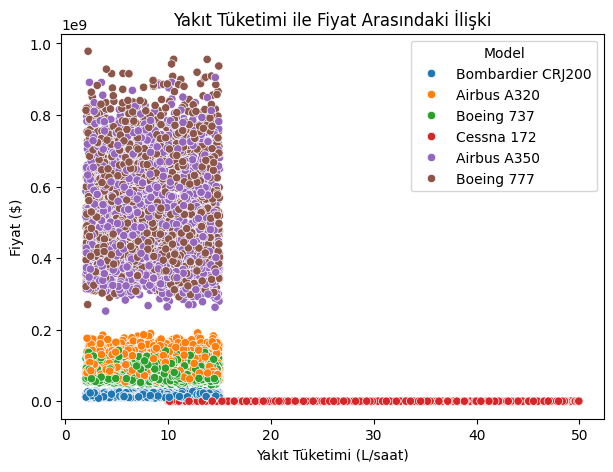

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["Yakıt Tüketimi (L/saat)"], y=df["Fiyat ($)"], hue = df["Model"])
plt.title("Yakıt Tüketimi ile Fiyat Arasındaki İlişki")
plt.show()

- Cessna 172 modeli için yakıt tüketimi arttıkça fiyatında herhangi bir değişim olmadığı gözükmekte. Bu uçak modelinin daha az kapasiteli olmasından dolayı kaynaklanıyor olabilir.

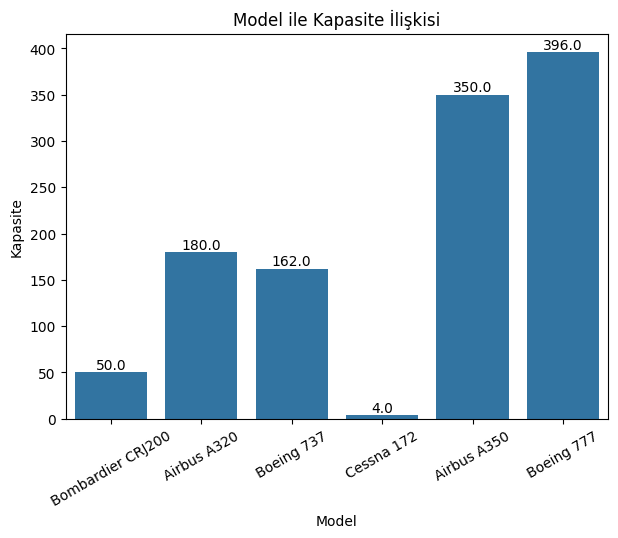

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=df["Model"], y=df["Kapasite"])
plt.title("Model ile Kapasite İlişkisi")
plt.xlabel("Model")
plt.ylabel("Kapasite")
plt.xticks(rotation=30)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


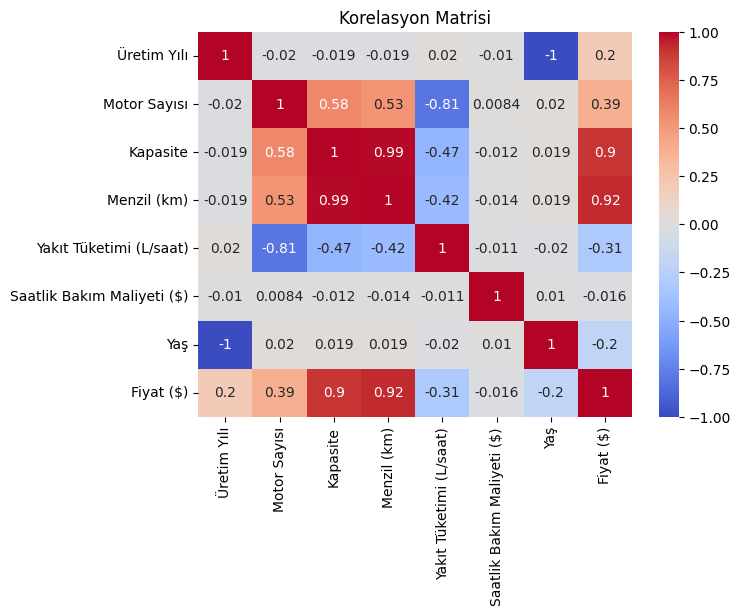

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

- ``Üretim yılı`` ve `yaş` negatif korelasyon gösteriyor
- ``Kapasite`` ``Menzil`` birbirleri arasında yüksek korelasyon gösteriyor. Multicollinearity oluşturuyor.
- `Fiyat` ile yüksek korelasyon gösteren `Kapasite` `Menzil` özelliklerinden biri kullanılacak modele göre çıkarılabilir.

# paCe: Construct

In [ ]:
categoric_columns

Index(['Model', 'Motor Türü', 'Satış Bölgesi'], dtype='object')

## Encoding

In [ ]:
df_encoding = df.copy()
df_encoding["Motor Türü2"] = df_encoding["Motor Türü"].map({"Piston": 0, "Turbofan": 1})
df_encoding.head()

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($),Motor Türü2
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07,1
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07,1
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07,1
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08,1
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05,0


In [ ]:
df_encoding = pd.get_dummies(df_encoding, columns=["Satış Bölgesi", "Model"], drop_first=True)
df_encoding.head()

,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Fiyat ($),Motor Türü2,Satış Bölgesi_Asya,Satış Bölgesi_Avrupa,Satış Bölgesi_Avustralya,Satış Bölgesi_Güney Amerika,Satış Bölgesi_Kuzey Amerika,Model_Airbus A350,Model_Boeing 737,Model_Boeing 777,Model_Bombardier CRJ200,Model_Cessna 172
0,1987,2,Turbofan,50,3000,14.36,2185.43,36,1.285708e+07,1,True,False,False,False,False,False,False,False,True,False
1,1997,2,Turbofan,50,3000,4.03,1202.08,26,1.391406e+07,1,False,True,False,False,False,False,False,False,True,False
2,1988,2,Turbofan,180,6300,13.26,761.38,35,9.073570e+07,1,False,False,True,False,False,False,False,False,False,False
3,2023,2,Turbofan,162,5700,14.61,592.63,0,1.366597e+08,1,False,False,True,False,False,False,True,False,False,False
4,1985,1,Piston,4,1285,18.49,4245.99,38,2.037981e+05,0,False,False,False,True,False,False,False,False,False,True


In [ ]:
df_encoding.drop("Motor Türü", axis=1, inplace=True)
df_encoding.dtypes

,0
Üretim Yılı,int64
Motor Sayısı,int64
Kapasite,int64
Menzil (km),int64
Yakıt Tüketimi (L/saat),float64
Saatlik Bakım Maliyeti ($),float64
Yaş,int64
Fiyat ($),float64
Motor Türü2,int64
Satış Bölgesi_Asya,bool


## Modelling

In [ ]:
X = df_encoding.drop("Fiyat ($)", axis=1)
y = df_encoding["Fiyat ($)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4689009168131553.0
Root Mean Squared Error: 68476340.20690323
R-squared: 0.9122786537125462


In [ ]:
def get_result(model_name, mse, rmse, r2):
  result_df = pd.DataFrame({
      "model_name": [model_name],
      "mse": [mse],
      "rmse": [rmse],
      "r2": [r2]
  })

  return result_df


In [ ]:
results = get_result("Linear Regression", mse, rmse, r2)
results

,model_name,mse,rmse,r2
0,Linear Regression,4.689009e+15,6.847634e+07,0.912279


## Load and save models

In [ ]:
import pickle

def write_model(path, model_object, model_name:str):
    with open(path + model_name + ".pickle", "wb") as file:
        pickle.dump(model_object, file)

def load_model(path, model_name):
    with open(path + model_name + ".pickle", "rb") as file:
        model = pickle.load(file)
    return model

## AdaBoost Regression

In [ ]:
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 1],
    'loss': ['linear', 'square', 'exponential']
}

metrics = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']

ada_reg = AdaBoostRegressor(random_state=42)

ada_grid = GridSearchCV(ada_reg, ada_params, cv=5, scoring=metrics, refit='r2', n_jobs=-1, verbose=True)

In [ ]:
ada_grid.fit(X_train, y_train)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 200]},
             refit='r2',
             scoring=['neg_mean_squared_error', 'neg_root_mean_squared_error',
                      'r2'],
             verbose=True)

In [ ]:
write_model("/content/", ada_grid.best_estimator_, "AdaBoostRegressor")

In [ ]:
y_pred = ada_grid.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1096037370128790.5
Root Mean Squared Error: 33106455.112693515
R-squared: 0.9794954818296144


In [ ]:
result = get_result("AdaBoostRegressor", mse, rmse, r2)
results = pd.concat([results, result], ignore_index=True)
results

,model_name,mse,rmse,r2
0,Linear Regression,4.689009e+15,6.847634e+07,0.912279
1,AdaBoostRegressor,1.096037e+15,3.310646e+07,0.979495


## Gradient Boost Regression

In [ ]:
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}

gb_reg = GradientBoostingRegressor(random_state=42)

gb_grid = GridSearchCV(gb_reg, gb_params, cv=5, scoring=metrics, refit='r2', n_jobs=-1, verbose=True)

In [ ]:
%%time
gb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: user 3.23 s, sys: 634 ms, total: 3.87 s
Wall time: 6min 55s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             refit='r2',
             scoring=['neg_mean_squared_error', 'neg_root_mean_squared_error',
                      'r2'],
             verbose=True)

In [ ]:
y_pred = gb_grid.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 971557360939162.2
Root Mean Squared Error: 31169814.900624003
R-squared: 0.9818242369248705


In [ ]:
result = get_result("GradientBoostingRegressor", mse, rmse, r2)
results = pd.concat([results, result], ignore_index=True)
results

,model_name,mse,rmse,r2
0,Linear Regression,4.689009e+15,6.847634e+07,0.912279
1,AdaBoostRegressor,1.096037e+15,3.310646e+07,0.979495
2,GradientBoostingRegressor,9.715574e+14,3.116981e+07,0.981824


In [ ]:
write_model(  "/content/", gb_grid.best_estimator_, "GradientBoostingRegressor")

## XGBoost Regression

In [ ]:
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

xgb_reg = XGBRegressor(random_state=42)

xgb_grid = GridSearchCV(xgb_reg, xgb_params, cv=5, scoring=metrics, refit='r2', n_jobs=-1, verbose=True)

In [ ]:
%%time
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: user 612 ms, sys: 76.1 ms, total: 688 ms
Wall time: 25.5 s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             refit='r2',
             scoring=['neg_mean_squared_error', 'neg_root_mean_squared_error',
                      'r2'],
             verbose=True)

In [ ]:
y_pred = xgb_grid.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 969235240062027.9
Root Mean Squared Error: 31132543.10303011
R-squared: 0.9818676788466669


In [ ]:
result = get_result("XGBRegressor", mse, rmse, r2)
results = pd.concat([results, result], ignore_index=True)
results

,model_name,mse,rmse,r2
0,Linear Regression,4.689009e+15,6.847634e+07,0.912279
1,AdaBoostRegressor,1.096037e+15,3.310646e+07,0.979495
2,GradientBoostingRegressor,9.715574e+14,3.116981e+07,0.981824
3,XGBRegressor,9.692352e+14,3.113254e+07,0.981868


In [ ]:
write_model("/content/", xgb_grid.best_estimator_, "XGBRegressor")

In [ ]:
xgb_grid_best_estimator_ = load_model("/content/", "XGBRegressor")

# pacE: Execute

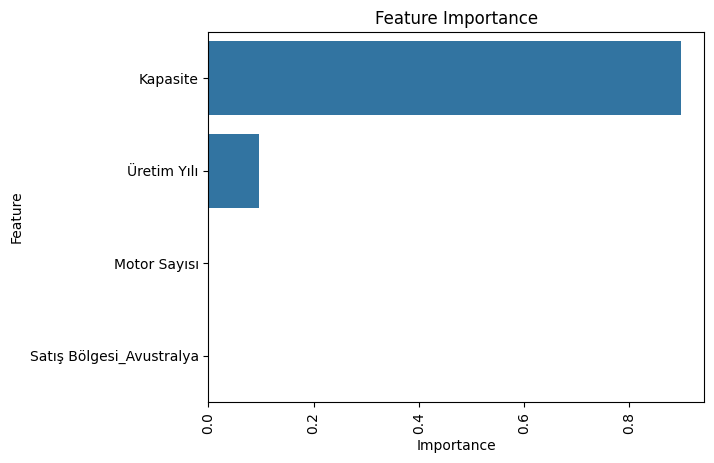

In [ ]:
xgboost_importances = pd.DataFrame(xgb_grid_best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )

xgboost_importances = xgboost_importances.sort_values('gini_importance', ascending=False)
sns.barplot(y=xgboost_importances.index[:4], x=xgboost_importances['gini_importance'][:4], orient = "h")
plt.xticks(rotation=90)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


## Summary

- Kapasite, doğrudan uçağın büyüklüğü ve taşıma kapasitesi ile ilgili olduğu için fiyat üzerinde belirleyici bir etkiye sahip.
- Üretim Yılı ise uçakların yaşını gösterdiği için, genellikle yaşlanan uçaklar daha düşük fiyatlara sahip olur. Bu yüzden üretim yılı, modeldeki en etkili faktörlerden biri olabiliyor.
- XGBRegression fiyatları tahminlerken yaklaşık %98 bir başarı sağlıyor. Ayrıca RMSE için de diğer modellere göre daha az sapma gösteriyor.